## Pandas plots | Kaggle tutorial

In [1]:
import os
import pandas as pd
%matplotlib inline

# Univariate plots

In [2]:
reviews = pd.read_csv(os.getcwd() + "\winemag-data_first150k.csv", index_col=0)
reviews.head(3)

,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley


### Univariate Nominal

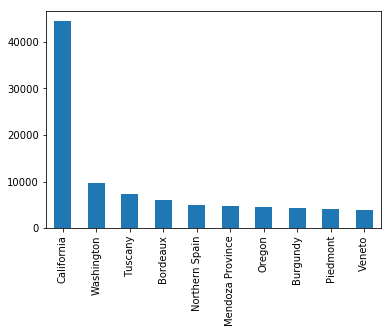

In [3]:
reviews['province'].value_counts().head(10).plot.bar()

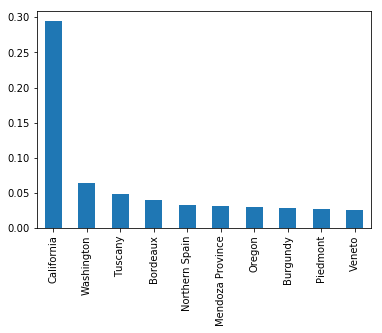

In [4]:
(reviews['province'].value_counts().head(10) / len(reviews)).plot.bar()

### Univariate Ordinal

Here pandas defaults to sortin by value counts; but since scores are ordinal we may want to maintain our order; we do this with sort_index()

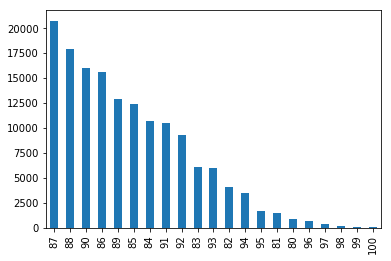

In [5]:
reviews['points'].value_counts().plot.bar()

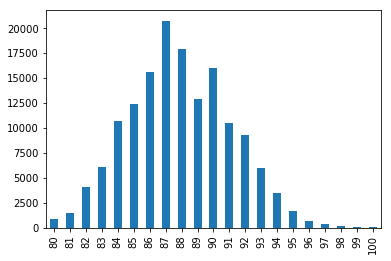

In [6]:
reviews['points'].value_counts().sort_index().plot.bar()

Consider a dataset in which scores covered a much broader range, we would need a line plot to fit everything cleanly

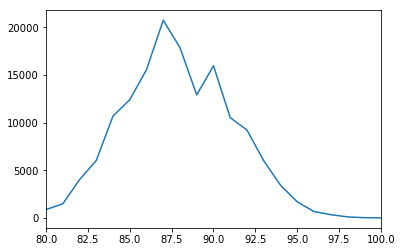

In [7]:
reviews['points'].value_counts().sort_index().plot.line()

Area charts are more or less interchangable with line charts when plottin univariate data

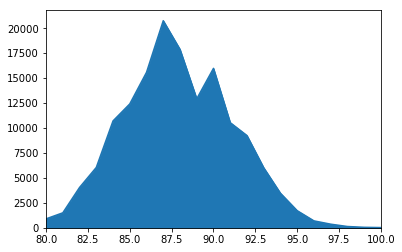

In [8]:
reviews['points'].value_counts().sort_index().plot.area()

Histograms for interval (a subset of ordinal, where intervals between values are meaningful) data.

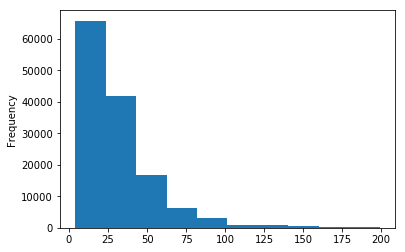

In [9]:
reviews[reviews['price'] < 200]['price'].plot.hist()

Histograms are also useful for ordinal categorical values like *points*

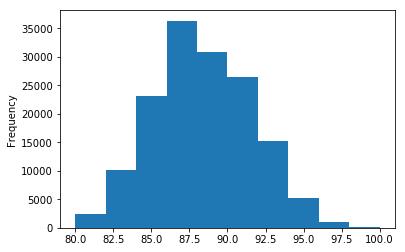

In [10]:
reviews['points'].plot.hist()

## Section 2: Questions

In [11]:
pd.set_option('max_columns', None)
pokemon = pd.read_csv("./pokemon.csv")
pokemon.head(3)

,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,against_grass,against_ground,against_ice,against_normal,against_poison,against_psychic,against_rock,against_steel,against_water,attack,base_egg_steps,base_happiness,base_total,capture_rate,classfication,defense,experience_growth,height_m,hp,japanese_name,name,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
0,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,0.25,1.0,2.0,1.0,1.0,2.0,1.0,1.0,0.5,49,5120,70,318,45,Seed Pokémon,49,1059860,0.7,45,Fushigidaneフシギダネ,Bulbasaur,88.1,1,65,65,45,grass,poison,6.9,1,0
1,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,0.25,1.0,2.0,1.0,1.0,2.0,1.0,1.0,0.5,62,5120,70,405,45,Seed Pokémon,63,1059860,1.0,60,Fushigisouフシギソウ,Ivysaur,88.1,2,80,80,60,grass,poison,13.0,1,0
2,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,0.25,1.0,2.0,1.0,1.0,2.0,1.0,1.0,0.5,100,5120,70,625,45,Seed Pokémon,123,1059860,2.0,80,Fushigibanaフシギバナ,Venusaur,88.1,3,122,120,80,grass,poison,100.0,1,0


The frequency of Pokemon by type

Only 18 types; nominal data; suitable for bar plot

In [12]:
len(pokemon['type1'].unique())

18

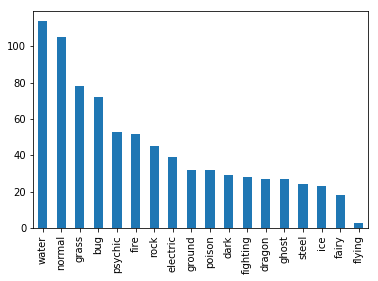

In [13]:
pokemon['type1'].value_counts().plot.bar()

The frequency of Pokemon by HP stat total:

Too many categories here, so use a histogram or line plot. Seems to be quite skewed so line is probably better.  
Critical that you sort_index so axis follows logical order 0 to 250.

In [14]:
print ("hp ranges from {} to {}".format(pokemon['hp'].min(), pokemon['hp'].max()))

hp ranges from 1 to 255


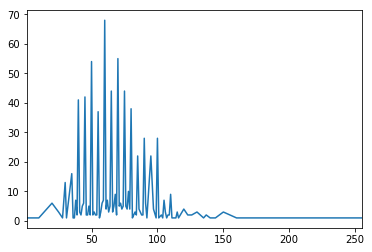

In [15]:
pokemon['hp'].value_counts().sort_index().plot.line()

The frequency of Pokemon by weight

Would make sense to bin these weights in a histogram since they're highly specific

In [16]:
print ("weights range from {} to {}".format(pokemon['weight_kg'].min(), pokemon['weight_kg'].max()))

weights range from 0.1 to 999.9


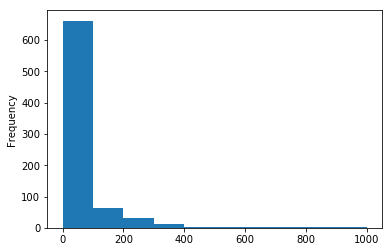

In [17]:
pokemon['weight_kg'].plot.hist()

# Bivariate plots with pandas

In [18]:
reviews.head(3)

,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley


Scatter plot of price and points. We have to downsample our data here as naive scatter plots overlay points ontop of eachother, this would occur a lot if we didnt take a sample.

Scatter plots are great for small data sets, particularly if variables have a large number of unique values.

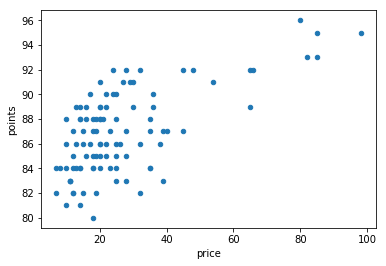

In [19]:
reviews[reviews['price'] < 100].sample(100).plot.scatter(x='price', y='points')

Hex plots help deal with the issue of overplotting that scatter plots encounter; we can see our points are clustered around 87.5 and $20 here, whereas if we do a full (non-downsampled) scatter plot, this trend is not clear at all.

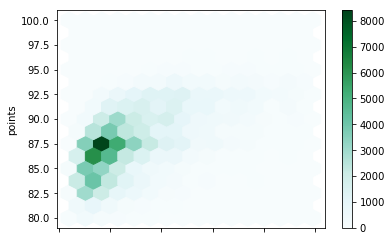

In [20]:
reviews[reviews['price'] < 100].plot.hexbin(x='price', y='points', gridsize=15)

### Stacked plots

In [21]:
wine_counts = pd.read_csv(os.getcwd() + "\\top-five-wine-score-counts.csv",index_col=0) #sets 'points' to our row index

In [22]:
wine_counts.head()

,Bordeaux-style Red Blend,Cabernet Sauvignon,Chardonnay,Pinot Noir,Red Blend
points,,,,,
80,5.0,87.0,68.0,36.0,72.0
81,18.0,159.0,150.0,83.0,107.0
82,72.0,435.0,517.0,295.0,223.0
83,95.0,570.0,669.0,346.0,364.0
84,268.0,923.0,1146.0,733.0,602.0


Important note: pandas multivariate plots usually expect input data in the following format:  
    - one categorical variable in the columns
    - one categorical variable in the rows
    - the counts of their intersections in the entries

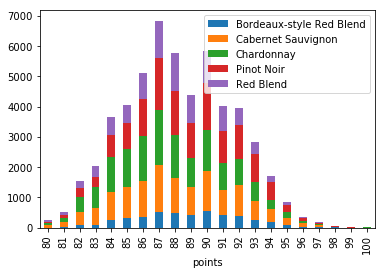

In [23]:
wine_counts.plot.bar(stacked=True)

This is quite similar to an area plot, perhaps area plots are better when the number of categories becomes unwieldly. This works here because theres only five wines we're looking at, but again if there are too many categories the graph will be difficult to interpret.

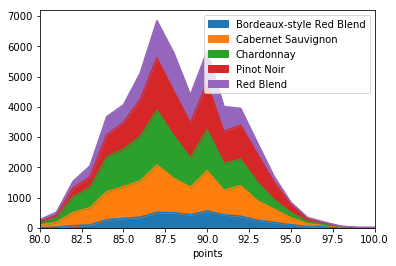

In [24]:
wine_counts.plot.area()

### Bivariate Line Plots

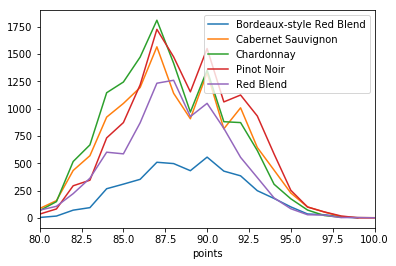

In [25]:
wine_counts.plot.line()

## Bivariate Questions

In [26]:
pokemon = pd.read_csv("Pokemon.csv", index_col=32)
cols = [c for c in pokemon.columns if "against" not in c]
pokemon = pokemon[cols]

In [27]:
pokemon.head(2)

,abilities,attack,base_egg_steps,base_happiness,base_total,capture_rate,classfication,defense,experience_growth,height_m,hp,japanese_name,name,percentage_male,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
pokedex_number,,,,,,,,,,,,,,,,,,,,,,
1,"['Overgrow', 'Chlorophyll']",49,5120,70,318,45,Seed Pokémon,49,1059860,0.7,45,Fushigidaneフシギダネ,Bulbasaur,88.1,65,65,45,grass,poison,6.9,1,0
2,"['Overgrow', 'Chlorophyll']",62,5120,70,405,45,Seed Pokémon,63,1059860,1.0,60,Fushigisouフシギソウ,Ivysaur,88.1,80,80,60,grass,poison,13.0,1,0


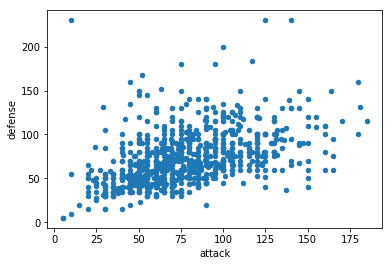

In [28]:
pokemon.plot.scatter(x='attack', y='defense')

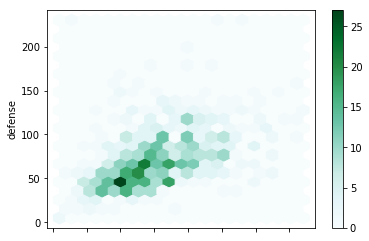

In [31]:
pokemon.plot.hexbin(x='attack',y='defense',gridsize=20)

In [42]:
pokemon_stats_legendary = pokemon.groupby(['is_legendary', 'generation']).mean()[['attack', 'defense']]
pokemon_stats_legendary.rename(index={0:'True', 1:'False'}, level='is_legendary', inplace=True)

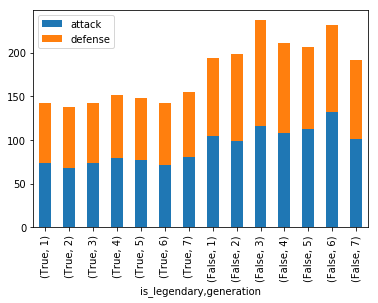

In [46]:
pokemon_stats_legendary.plot.bar(stacked=True)

In [49]:
pokemon.columns

Index(['abilities', 'attack', 'base_egg_steps', 'base_happiness', 'base_total',
       'capture_rate', 'classfication', 'defense', 'experience_growth',
       'height_m', 'hp', 'japanese_name', 'name', 'percentage_male',
       'sp_attack', 'sp_defense', 'speed', 'type1', 'type2', 'weight_kg',
       'generation', 'is_legendary'],
      dtype='object')

In [50]:
pokemon_stats_by_generation = pokemon.groupby('generation').mean()[['hp', 'attack', 'defense', 'sp_attack', 'sp_defense', 'speed']]

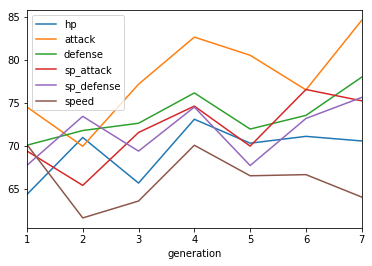

In [52]:
pokemon_stats_by_generation.plot.line()

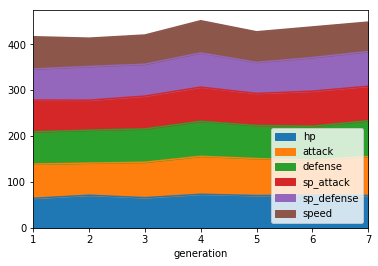

In [53]:
pokemon_stats_by_generation.plot.area()

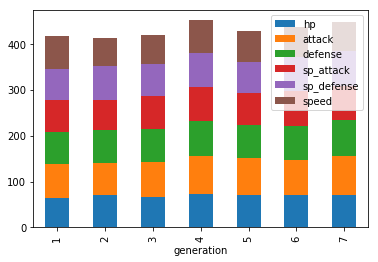

In [54]:
pokemon_stats_by_generation.plot.bar(stacked=True)